In [4]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [6]:
data=pd.read_csv("uber.csv")
df=data.copy()
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df.shape
#it returns rows and columns

(200000, 9)

In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [12]:
#preprocessing of data
#pickup_datetime is not in proper format
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

#drop missing values
df.dropna(inplace=True)

#remove outliers
q_low=df["fare_amount"].quantile(0.01)
q_high=df["fare_amount"].quantile(0.99)
df=df[(df["fare_amount"]>q_low) & (df["fare_amount"]<q_high)]

#feature extraction (extracting date and time parts)
df["year"]=df["pickup_datetime"].dt.year
df["month"]=df["pickup_datetime"].dt.month
df["day"]=df["pickup_datetime"].dt.day
df["hour"]=df["pickup_datetime"].dt.hour

#drop unnecessary columns
df.drop(["key","pickup_datetime","Unnamed: 0"],axis=1,inplace=True)


In [13]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17
...,...,...,...,...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1,2014,1,31,14
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,14,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,29,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,20,14


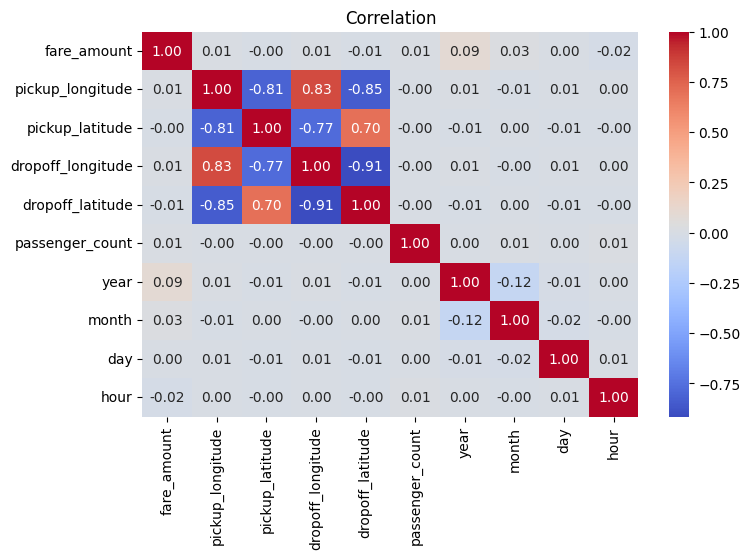

In [14]:
#checking correlation
plt.figure(figsize=(8,5))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
#annot =True means numeric values
#fmt=".2f" means upto 2 decimal points
plt.title("Correlation")
plt.show()

In [15]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
fare_amount,1.000000,0.006534,-0.004843,0.006012,-0.007651,0.012145,0.093406,0.027050,0.003107,-0.021835
pickup_longitude,0.006534,1.000000,-0.810943,0.832846,-0.846712,-0.000737,0.008703,-0.005011,0.005263,0.003073
pickup_latitude,-0.004843,-0.810943,1.000000,-0.773097,0.697275,-0.001288,-0.009136,0.004863,-0.008313,-0.004321
dropoff_longitude,0.006012,0.832846,-0.773097,1.000000,-0.914509,-0.000020,0.006282,-0.003815,0.005341,0.004120
dropoff_latitude,-0.007651,-0.846712,0.697275,-0.914509,1.000000,-0.000537,-0.008904,0.003984,-0.008092,-0.003172
passenger_count,0.012145,-0.000737,-0.001288,-0.000020,-0.000537,1.000000,0.004082,0.010026,0.003119,0.013494
year,0.093406,0.008703,-0.009136,0.006282,-0.008904,0.004082,1.000000,-0.115413,-0.011538,0.002102
month,0.027050,-0.005011,0.004863,-0.003815,0.003984,0.010026,-0.115413,1.000000,-0.017679,-0.003672
day,0.003107,0.005263,-0.008313,0.005341,-0.008092,0.003119,-0.011538,-0.017679,1.000000,0.005051
hour,-0.021835,0.003073,-0.004321,0.004120,-0.003172,0.013494,0.002102,-0.003672,0.005051,1.000000


In [16]:
#Implement linear regression and random forest regression models

#spliting the model
x=df.drop(["fare_amount"],axis=1)
y=df["fare_amount"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
lr_predict=lr.predict(x_test)

In [19]:
lr_rsme=np.sqrt(mean_squared_error(y_test,lr_predict))
print("RSME score:",lr_rsme)
lr_r2=r2_score(y_test,lr_predict)
print("R2 score:",lr_r2)

RSME score: 8.06321530465613
R2 score: 0.011806445683200106


In [22]:
#RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50,random_state=42)
rfr.fit(x_train,y_train)
rfr_predict=rfr.predict(x_test)

In [23]:
rfr_rsme=np.sqrt(mean_squared_error(y_test,rfr_predict))
print("RSME score:",rfr_rsme)
rfr_r2=r2_score(y_test,rfr_predict)
print("R2 score:",rfr_r2)

RSME score: 3.4456031440919372
R2 score: 0.8195503625475775


In [26]:
model_for_prediction = rfr      # best model
example = [[-73.985, 40.748, -73.985, 40.758, 1, 2015, 5, 7, 19]]   # 2D array input

predicted = model_for_prediction.predict(example)   # ✅ use predict()
print("Predicted Fare:", round(predicted[0], 2), "USD")
      #it returns an array...so we extract its first index value...and round it to 2 decimal places

Predicted Fare: 7.79 USD


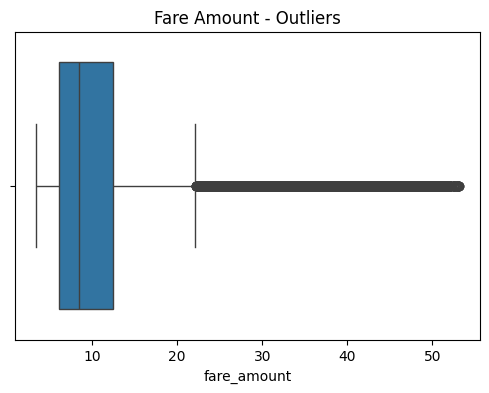

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount - Outliers')
plt.show()

               Model      RMSE  R² Score
0  Linear Regression  8.063215  0.011806
1      Random Forest  3.445603  0.819550


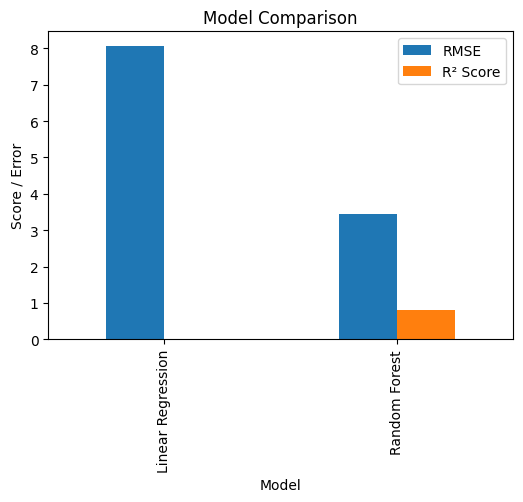

In [30]:
# 📊 Cell 10: Model Comparison Summary
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rsme, rfr_rsme],
    "R² Score": [lr_r2, rfr_r2]
})
print(comparison)
comparison.set_index('Model').plot(kind='bar', figsize=(6,4))
plt.title("Model Comparison")
plt.ylabel("Score / Error")
plt.show()